In [1]:
import pandas as pd
A = pd.read_csv("C:/Users/tpasv/Desktop/Data Science/Data Science/Dataset/Cars93.csv")

In [2]:
A.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Data Preprocessing

In [4]:
A = A.drop(labels=["Unnamed: 0","Manufacturer","Model"],axis=1)

In [5]:
def replacer(df):
    Q = pd.DataFrame(df.isna().sum())
    Q.columns=["CT"]
    w = list(Q[Q.CT>0].index)
    
    cat = []
    con = []
    for i in w:
        if(df[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)

    for i in con:
        replacer = df[i].mean()
        df[i] = df[i].fillna(replacer)

    for i in cat:
        replacer = pd.DataFrame(df[i].value_counts()).index[0]
        df[i] = df[i].fillna(replacer)

In [6]:
replacer(A)

# EDA

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt

In [8]:
cat = []
con = []
for i in A.columns:
    if (A[i].dtypes =="object"):
        cat.append(i)
    else:
        con.append(i)

In [9]:
A.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.361525,0.395783,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.301888,0.354635,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.241600,0.307020,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.380435,-0.462204,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.364284,-0.327732,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.473740,0.618326,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.236871,0.328568,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.333847,-0.481744,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.370410,-0.557095,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.503797,0.528362,0.894018


In [10]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

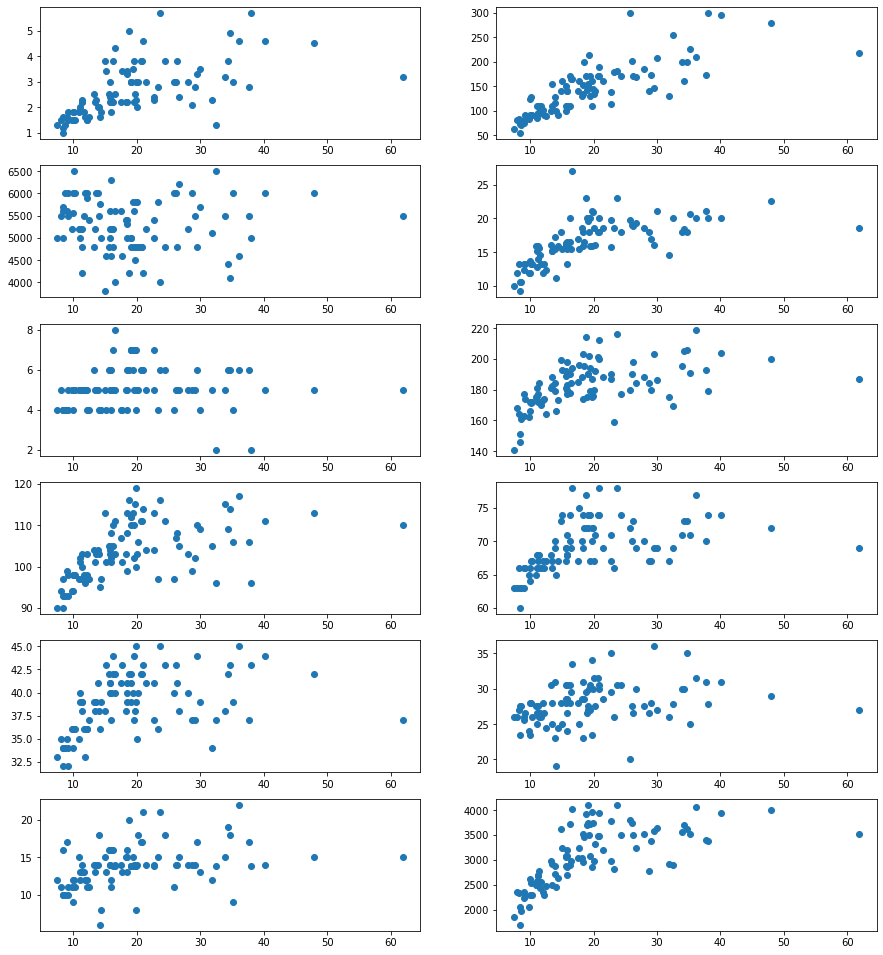

In [20]:
plt.figure(figsize=(15,17))
plt.subplot(6,2,1)
plt.scatter(A.Price,A.EngineSize)
plt.subplot(6,2,2)
plt.scatter(A.Price,A.Horsepower)
plt.subplot(6,2,3)
plt.scatter(A.Price,A.RPM)
plt.subplot(6,2,4)
plt.scatter(A.Price,A[["Fuel.tank.capacity"]])
plt.subplot(6,2,5)
plt.scatter(A.Price,A.Passengers)
plt.subplot(6,2,6)
plt.scatter(A.Price,A.Length)
plt.subplot(6,2,7)
plt.scatter(A.Price,A.Wheelbase)
plt.subplot(6,2,8)
plt.scatter(A.Price,A.Width)
plt.subplot(6,2,9)
plt.scatter(A.Price,A[["Turn.circle"]])
plt.subplot(6,2,10)
plt.scatter(A.Price,A[["Rear.seat.room"]])
plt.subplot(6,2,11)
plt.scatter(A.Price,A[["Luggage.room"]])
plt.subplot(6,2,12)
plt.scatter(A.Price,A.Weight)


In [21]:
def ANOVA (con,cat,DF):
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con+""+"~"+""+cat
    model = ols(rel,DF).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = pd.DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    print("%.40f"%a)

In [22]:
cat

['Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [23]:
ANOVA("Price","Type",A)

0.0000000147699903566454386534008137677951


In [24]:
ANOVA("Price","AirBags",A)

0.0000007207033347013524509600359592431662


In [25]:
ANOVA("Price","DriveTrain",A)

0.0000420186487725166424745532056661545539


In [26]:
ANOVA("Price","Cylinders",A)

0.0000000003042776105990511385677817238974


In [27]:
ANOVA("Price","Origin",A)

0.3368302180836658665796790046442765742540


In [28]:
ANOVA("Price","Make",A)

nan


G:\Anaconda\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


# Creating Model for Training Data

In [70]:
Y = A[["Price"]]
X = A[["EngineSize","Horsepower","Fuel.tank.capacity","Wheelbase","Width","Weight"]]
X = X.join(pd.get_dummies(A[["Type","AirBags","Cylinders"]]))

# Multilinear Regression

In [71]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=22)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
print("Test/Validation Error: %.2f"%mean_absolute_error(ytest,pred))

Test/Validation Error: 3.47


# Ridge/Lasso

In [72]:
tuning_grid = []
q = 0.999
for i in range(0,100,1):
    tuning_grid.append(q-0.0001)
    q = q-0.001

In [73]:
q = 0
for i in range(0,100,1):
    tuning_grid.append(q+0.0001)
    q = q+0.001

In [75]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
rr = Ridge()
tp = {"alpha":tuning_grid}
cv = GridSearchCV(rr,tp,scoring="neg_mean_absolute_error")
cvmodel = cv.fit(X,Y)
cvmodel.best_params_

{'alpha': 0.9989}

In [76]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.9989)
model = rr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

3.4036066868318184

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lso = Lasso()
tp = {"alpha":tuning_grid}
cv = GridSearchCV(rr,tp,scoring="neg_mean_absolute_error")
cvmodel = cv.fit(X,Y)
cvmodel.best_params_

{'alpha': 0.9989}

In [78]:
from sklearn.linear_model import Lasso
lso = Lasso(alpha=0.9989)
model = lso.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

4.029551843763247